# El objeto estimador de Scikit-Learn
- Preprodesamientos de datos en skelarn.preprocessing
- Algoritmos de Machine Learning en sklearn.linear_model, sklearn.svm, sklearn.ensemble
- Evaluación de modelos con sklearn.molde_selection y sklearn.metrics

# Implementar un modelo de regressión (Lasso)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
X = pd.read_csv('X_movies')
X.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,budget,imdb_score,facebook_likes
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,2.370000e+08,7.9,4834.0
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,4.045539e+07,7.1,143.0
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,3.000000e+08,7.1,48350.0
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,2.450000e+08,6.8,11700.0
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,2.500000e+08,8.5,106759.0


In [11]:
y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis = 1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [13]:
print(len(X))
print(len(X_train))
print(len(X_test))

4104
2462
1642


### sklearn.linear_model

In [14]:
from sklearn.linear_model import Lasso

### Lasso

In [15]:
model = Lasso()
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
predict = model.predict(X_test)

In [17]:
predict.shape

(1642,)

Evaluación del modelo 

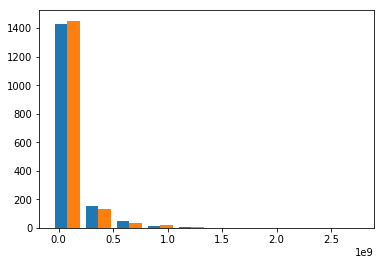

In [26]:
plt.hist([predict, y_test]);

# Ajustando modelos de Machine Learning, Underfitting y Overfitting
- **Underfitting:**
    - Se produce cuando un modelo no puede capturar la tendencia de los datos. Es generalmente el resultado de un modelo extremadamente simple.
- **Overfitting:**
    - Se produce cuando un algoritmo está perfectamente adaptado a los datos con los que lo entrenamos, pero si trataran de predecir nuevos datos, lo más probable es que nos de error.

# Evaluando el modelo

In [18]:
model.score(X_test, y_test)

0.57127462910856

In [19]:
residuals = y_test - predict

Text(0.5, 1.0, 'Error en dolares')

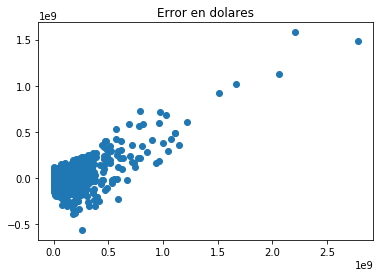

In [20]:
plt.scatter(y_test, residuals)
plt.title('Error en dolares')

In [21]:
ap_residuals = np.abs(residuals) / y_test

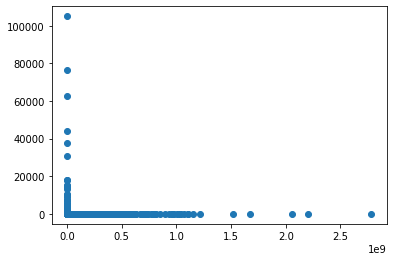

In [22]:
plt.scatter(y_test, ap_residuals)

In [23]:
lap_residuals = np.log(ap_residuals)

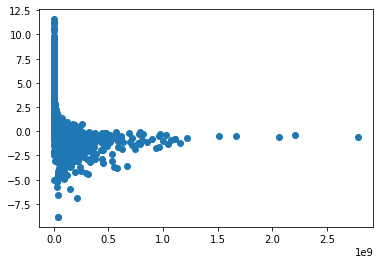

In [24]:
plt.scatter(y_test, lap_residuals)

Función cumulativa de la distribución de los errores

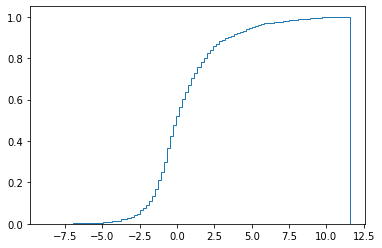

In [26]:
plt.hist(lap_residuals, bins=100, density=True, histtype='step', cumulative=True);

[-2, 0, 0, 1]

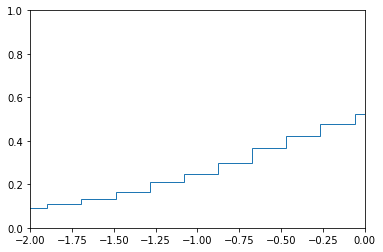

In [27]:
plt.hist(lap_residuals, bins=100, density=True, histtype='step', cumulative=True);
plt.axis([-2,0,0,1])